# <center>Modelling</center>

## Clustering

In [1]:
## Import Libary yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from scipy.sparse import csr_matrix

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
df=pd.read_csv('Clean_data.csv')

#### Feature Scaling with MinMaxScaler

In [3]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated(days ago)
count,9631.000000,9.631000e+03,9631.000000,9.631000e+03,9631.000000,9631.000000
mean,4.175138,2.172776e+05,20.288119,7.816721e+06,0.408041,504.914131
std,0.495506,1.833361e+06,20.639165,5.384641e+07,3.677998,418.167061
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,1.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000,288.000000
50%,4.200000,9.800000e+02,13.000000,1.000000e+05,0.000000,345.000000
75%,4.500000,2.952250e+04,27.000000,1.000000e+06,0.000000,596.000000
max,5.000000,7.812821e+07,100.000000,1.000000e+09,200.000000,3276.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9631 entries, 0 to 9630
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9631 non-null   object 
 1   Category                9631 non-null   object 
 2   Rating                  9631 non-null   float64
 3   Reviews                 9631 non-null   int64  
 4   Size                    9631 non-null   float64
 5   Installs                9631 non-null   int64  
 6   Type                    9631 non-null   object 
 7   Price                   9631 non-null   float64
 8   Content Rating          9631 non-null   object 
 9   Genres                  9631 non-null   object 
 10  Last Updated(days ago)  9631 non-null   int64  
 11  Current Ver             9631 non-null   object 
 12  Android Ver             9631 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 978.3+ KB


In [5]:
scaler = MinMaxScaler()
## Memilih Kolom yang akan di standarisasi dengan acuan nilai yang berupa angka/int dengan max diatas 1
list_standar=['Rating','Reviews','Size','Price','Last Updated(days ago)','Installs']

for x in list_standar:
    scaler.fit(df[[x]])
    df[x] = scaler.transform(df[[x]])

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated(days ago),Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0.7750,2.035116e-06,0.189919,1.000000e-05,Free,0.0,Everyone,Art & Design,0.148702,1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.9250,1.120082e-03,0.086909,5.000000e-03,Free,0.0,Everyone,Art & Design,0.085802,1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,0.8750,2.760130e-03,0.249925,5.000000e-02,Free,0.0,Teen,Art & Design,0.102290,Varies with device,4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.8250,1.237709e-05,0.027903,1.000000e-04,Free,0.0,Everyone,Art & Design;Creativity,0.098626,1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,0.8500,2.137512e-06,0.055906,5.000000e-05,Free,0.0,Everyone,Art & Design,0.236336,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,Sya9a Maroc - FR,FAMILY,0.8750,4.863800e-07,0.529953,5.000000e-06,Free,0.0,Everyone,Education,0.199389,1.48,4.1 and up
9627,Fr. Mike Schmitz Audio Teachings,FAMILY,1.0000,5.119790e-08,0.035904,1.000000e-07,Free,0.0,Everyone,Education,0.093740,1.0,4.1 and up
9628,Parkinson Exercices FR,MEDICAL,0.7975,3.839842e-08,0.094909,1.000000e-06,Free,0.0,Everyone,Medical,0.025344,1.0,2.2 and up
9629,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,0.8750,1.459140e-06,0.129913,1.000000e-06,Free,0.0,Mature 17+,Books & Reference,0.479695,Varies with device,Varies with device


Membuang Fitur/column yang tidak digunakan

In [6]:
df.drop(['App','Content Rating','Genres','Current Ver','Android Ver','Category','Type'],axis=1,inplace=True)

In [7]:
df

,Rating,Reviews,Size,Installs,Price,Last Updated(days ago)
0,0.7750,2.035116e-06,0.189919,1.000000e-05,0.0,0.148702
1,0.9250,1.120082e-03,0.086909,5.000000e-03,0.0,0.085802
2,0.8750,2.760130e-03,0.249925,5.000000e-02,0.0,0.102290
3,0.8250,1.237709e-05,0.027903,1.000000e-04,0.0,0.098626
4,0.8500,2.137512e-06,0.055906,5.000000e-05,0.0,0.236336
...,...,...,...,...,...,...
9626,0.8750,4.863800e-07,0.529953,5.000000e-06,0.0,0.199389
9627,1.0000,5.119790e-08,0.035904,1.000000e-07,0.0,0.093740
9628,0.7975,3.839842e-08,0.094909,1.000000e-06,0.0,0.025344
9629,0.8750,1.459140e-06,0.129913,1.000000e-06,0.0,0.479695


### Membuat Model

In [8]:
kmeans = KMeans(n_clusters=2,random_state=4)

In [9]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

In [10]:
## Centroid untuk setiap fitur
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroid_df

,Rating,Reviews,Size,Installs,Price,Last Updated(days ago)
0,0.791231,0.002235,0.122883,0.007269,0.002103,0.159786
1,0.805665,0.005320,0.574582,0.010366,0.001747,0.126331


In [11]:
## Label yang terbentuk
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

Untuk Mengevaluasi apakah jumlah cluster yang kita pilih optimal atau tidak, maka bisa dilakukan suatu cara untuk menentukan Jumlah n_cluster atau k terbaik dengan 2 metode berikut.

# Evaluation Model

### - Elbow Methods

In [12]:
inertia_list = []

for i in range(1,10):
    kmeans_iner = KMeans(n_clusters=i,random_state=4)
    kmeans_iner.fit(df)
    inertia_list.append(kmeans_iner.inertia_)

In [13]:
inertia_list

[751.5548316930615,
 463.50830790097365,
 356.5025152933984,
 289.90141078846995,
 235.47387252895905,
 210.49962029417537,
 192.85245014808325,
 170.84218108917196,
 156.27720289199576]

Text(0, 0.5, 'Inertia')

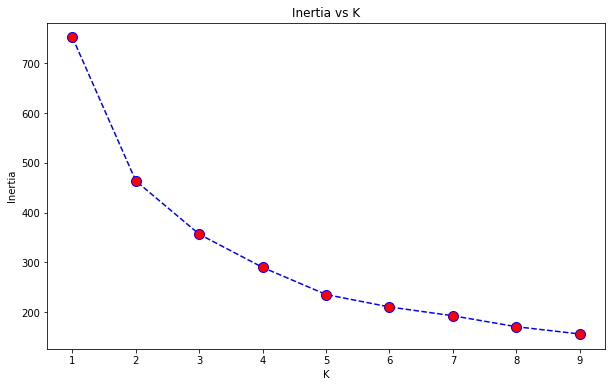

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia vs K')
plt.xlabel('K')
plt.ylabel('Inertia')

- Nilai terbaik adalah pada saat titik transisi dari yang fluktuatif ke landai, untuk lebih jelas lagi maka dicoba dengan metode lain yaitu Silhoutte Analyst

### - Silhoutte Analysis

For n_clusters = 2 The average silhouette_score is: 0.4737217152501959
For n_clusters = 3 The average silhouette_score is: 0.4029321825175198
For n_clusters = 4 The average silhouette_score is: 0.410632889835214
For n_clusters = 5 The average silhouette_score is: 0.3625059596652936
For n_clusters = 6 The average silhouette_score is: 0.3075865989680109


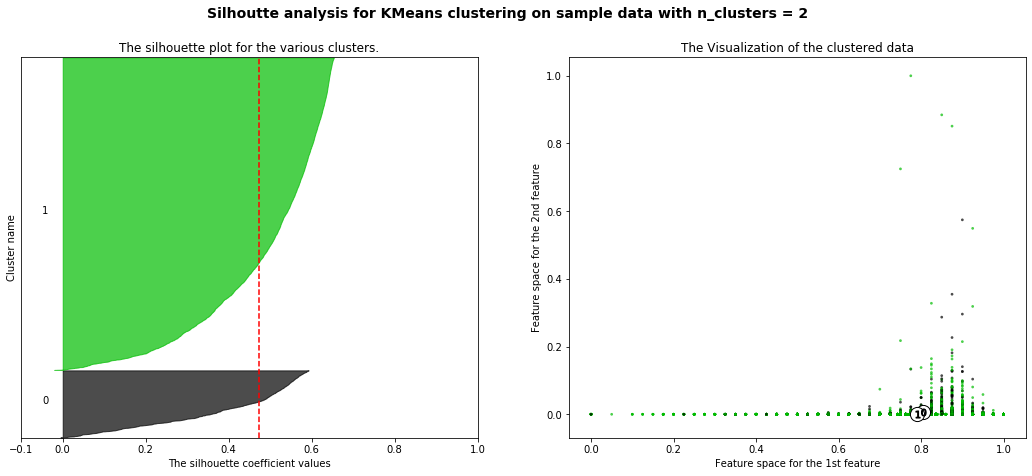

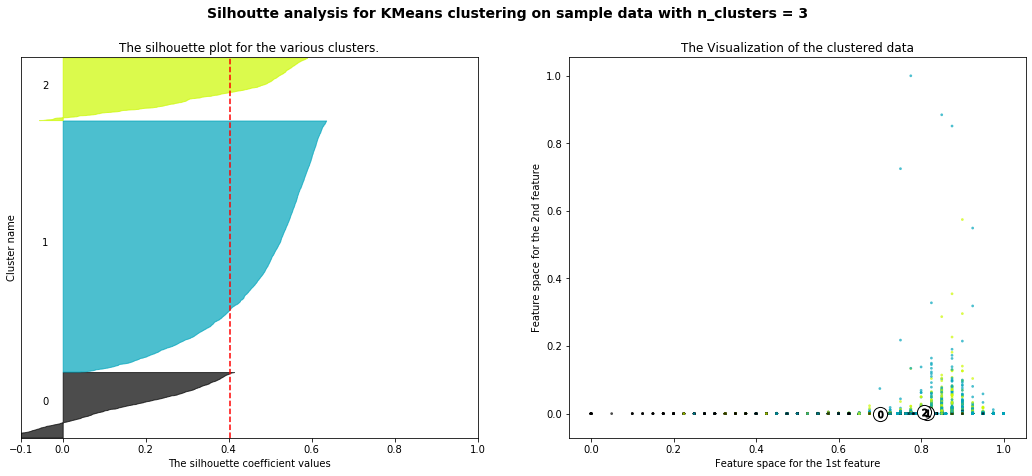

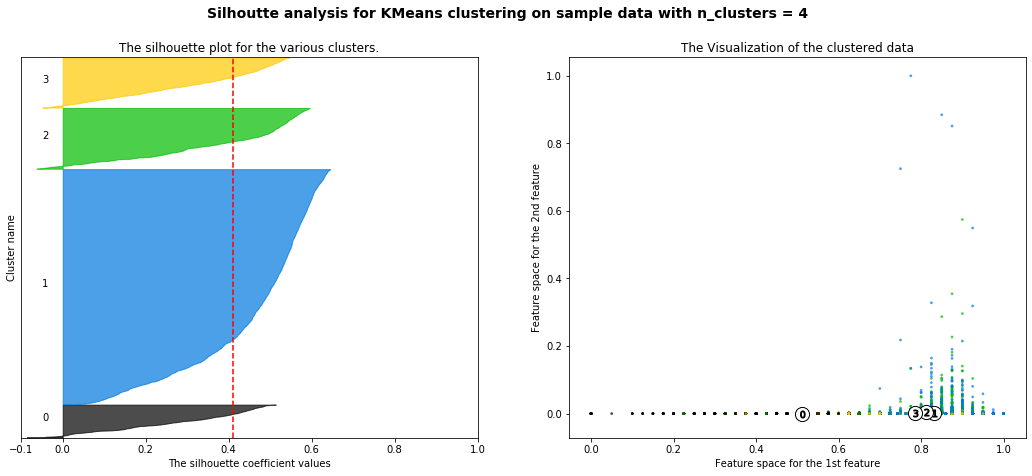

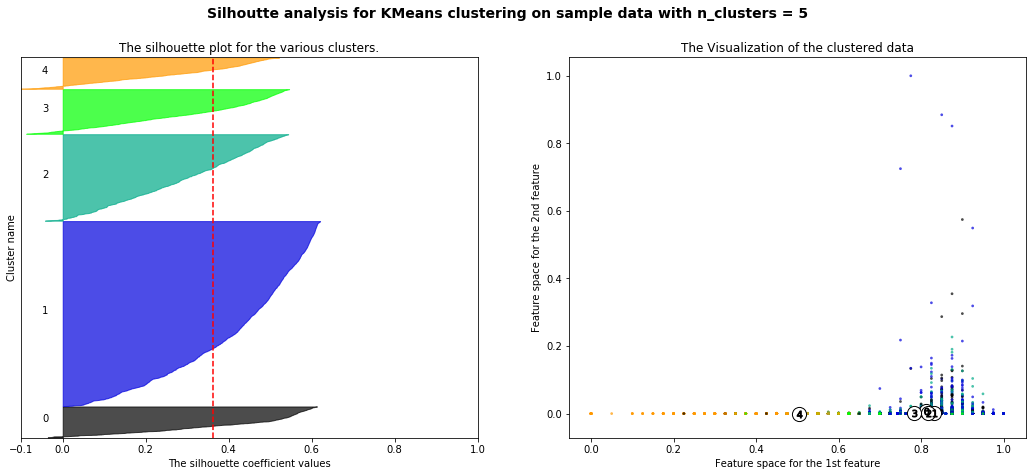

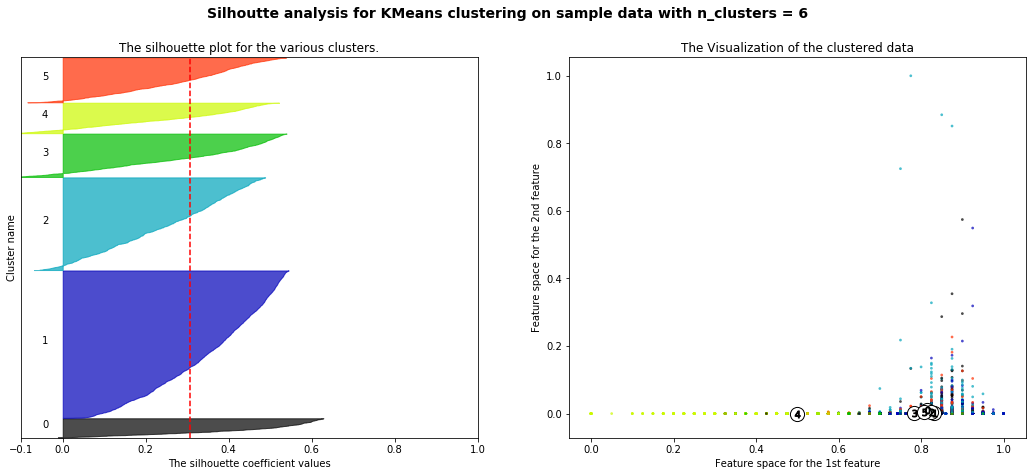

In [15]:
import string as str
sil_avg_score=[]
sample_score={}
range_n_clusters = [2,3,4,5,6]
X = df

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # the 1st column / subplot is the silhouettes analysis
    # silhouette analysis punya coeff -1, 1
    # untuk contoh kali ini dibikin -0.1 - 1
    ax1.set_xlim([-0.1,1])
    # memberi jarak silhouettes analysis antar cluster (n_clusters+1)*10
    ax1.set_ylim([0, len(X)+(n_clusters+1)*10])
    
    # Initialize kmeans > `clusterer` dengan random_state=10
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # kita pakai silhouettes_score untuk mendapatkan nilai rata-rata dari setiap sample
    # ini untuk mengetahui seberapa padat tiap cluster
    silhouettes_avg = silhouette_score(X, cluster_labels)
    sil_avg_score.append(silhouettes_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouettes_avg)
    
    # menghitung silhouette score untuk setiap sample
    sample_silhouettes_values = silhouette_samples(X, cluster_labels)
    sample_score[n_clusters] = sample_silhouettes_values
    
    y_lower=10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouettes_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # named the cluster for each silhouette plot
        ax1.text(-0.05, y_lower+0.5 * size_cluster_i, i)
        
        #Compute the new y_lower for next plot
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster name")
    
    # buat vertical line untuk menandakan average silhouettes score
    ax1.axvline(x=silhouettes_avg, color='red', linestyle='--')
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    #2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$'% i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The Visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhoutte analysis for KMeans clustering on sample data "
                 "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    
plt.show()

In [16]:
df_silavgscore=pd.DataFrame(sil_avg_score,columns=['Silhoutte Avg Score'],index=[2,3,4,5,6])
df_silavgscore

,Silhoutte Avg Score
2,0.473722
3,0.402932
4,0.410633
5,0.362506
6,0.307587


In [17]:
df_samples_score=pd.DataFrame(sample_score)
df_samples_score

,2,3,4,5,6
0,0.536239,0.517660,0.501203,0.180022,0.191770
1,0.578513,0.576455,0.574262,0.505866,0.353825
2,0.362407,0.502328,0.529731,0.188190,0.393398
3,0.641676,0.548010,0.550078,0.614080,0.538885
4,0.608933,0.273178,0.167427,0.313150,0.378300
...,...,...,...,...,...
9626,0.483120,0.456127,0.456742,0.082223,0.471654
9627,0.523180,0.468056,0.444892,0.436790,0.328582
9628,0.585408,0.603258,0.547046,0.491137,0.292866
9629,0.368376,0.288636,0.469241,0.473724,0.468720


In [18]:
lst=[2,3,4,5,6]
lst_abv_avg=[]
for num_clust in lst:
    abv_avg=len(df_samples_score[df_samples_score[num_clust] > df_silavgscore.loc[num_clust,'Silhoutte Avg Score']])
    lst_abv_avg.append(abv_avg)

In [19]:
df_silavgscore['Above Avg']=lst_abv_avg

In [20]:
df_silavgscore

,Silhoutte Avg Score,Above Avg
2,0.473722,5955
3,0.402932,5689
4,0.410633,5897
5,0.362506,5412
6,0.307587,5298


Kondisi Terbaik untuk memilih k terbaik adalah:
- nilai rata-rata harus sedekat mungkin dengan 1
- plot masing-masing cluster harus di atas nilai rata-rata sebanyak mungkin
- lebar plot harus seseragam mungkin.

dapat di simpulkan Untuk k=2 adalah k terbaik:
- nilai rata-rata terbaik ang mendekati 1
- cluster memiliki nilai di atas rata-rata terbanyak
- lebar cluster kurang uniform 

## Jumlah Cluster Terbaik

In [21]:
bestkmeans = KMeans(n_clusters=2,random_state=4)

In [22]:
bestkmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

In [23]:
## Centroid untuk setiap fitur
centroid_df = pd.DataFrame(bestkmeans.cluster_centers_, columns=df.columns)
centroid_df

,Rating,Reviews,Size,Installs,Price,Last Updated(days ago)
0,0.791231,0.002235,0.122883,0.007269,0.002103,0.159786
1,0.805665,0.005320,0.574582,0.010366,0.001747,0.126331


In [24]:
joblib.dump(bestkmeans, 'cluster_app')
joblib.dump(df, 'items_scaled')

['items_scaled']

In [25]:
dfclean=pd.read_csv('Clean_data.csv')

In [26]:
dfclean['best_cluster'] = bestkmeans.labels_

In [27]:
dfclean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated(days ago),Current Ver,Android Ver,best_cluster
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19.0,10000,Free,0.0,Everyone,Art & Design,488,1.0.0,4.0.3 and up,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,282,1.2.4,4.0.3 and up,0
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25.0,50000000,Free,0.0,Teen,Art & Design,336,Varies with device,4.2 and up,0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,324,1.1,4.4 and up,0
4,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5.6,50000,Free,0.0,Everyone,Art & Design,775,1.0,2.3 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,Sya9a Maroc - FR,FAMILY,4.50,38,53.0,5000,Free,0.0,Everyone,Education,654,1.48,4.1 and up,1
9627,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6,100,Free,0.0,Everyone,Education,308,1.0,4.1 and up,0
9628,Parkinson Exercices FR,MEDICAL,4.19,3,9.5,1000,Free,0.0,Everyone,Medical,84,1.0,2.2 and up,0
9629,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,13.0,1000,Free,0.0,Mature 17+,Books & Reference,1572,Varies with device,Varies with device,0


In [28]:
dfclean.groupby('best_cluster').mean()

,Rating,Reviews,Size,Installs,Price,Last Updated(days ago)
best_cluster,,,,,,
0,4.164927,174621.417508,12.299807,7.267923e+06,0.420573,524.243946
1,4.222672,415855.317087,57.476218,1.037155e+07,0.349701,414.927775


C:\Users\Brain\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\Users\Brain\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



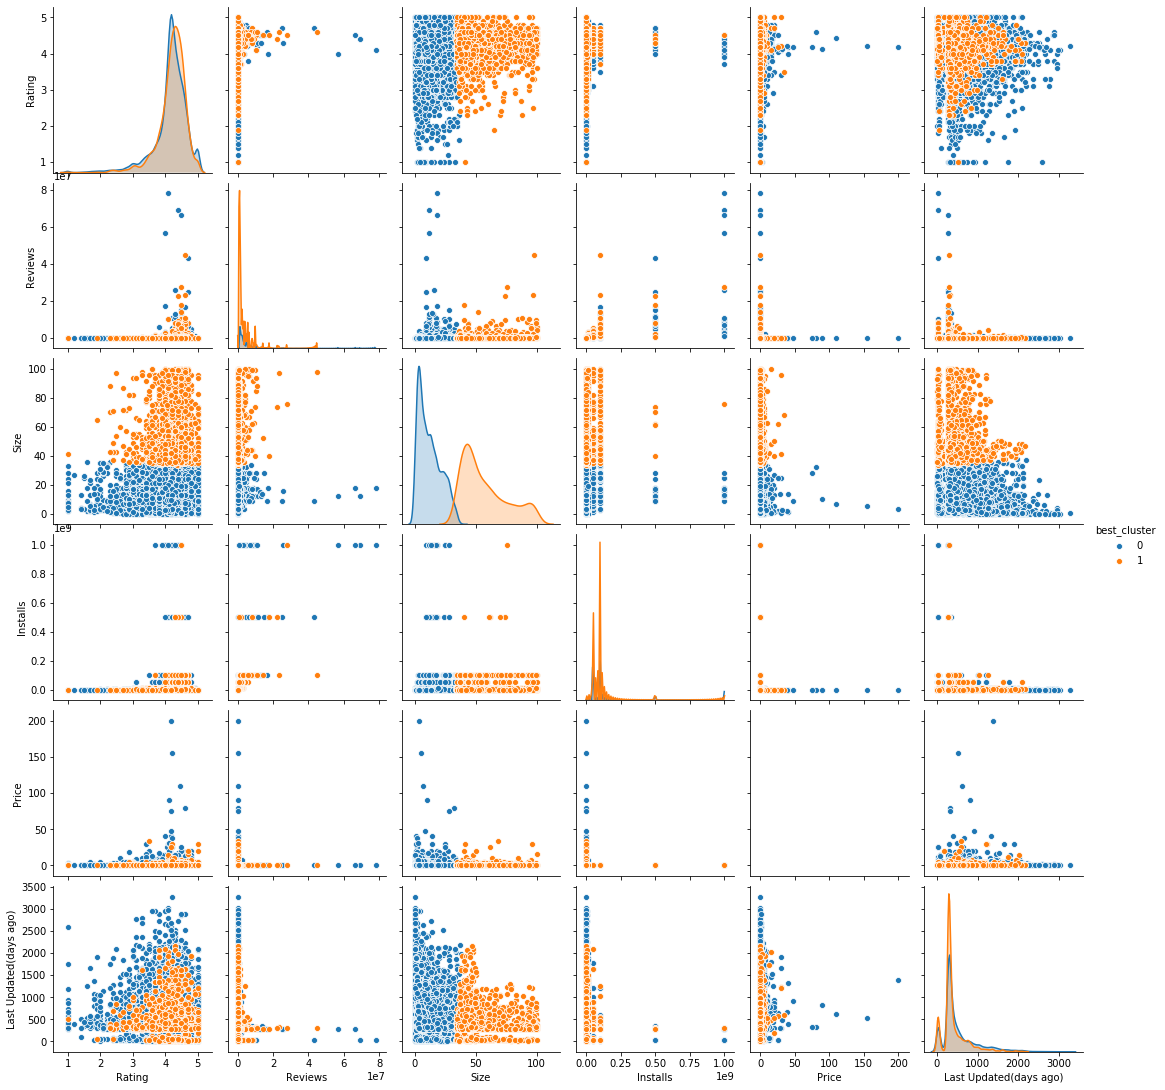

In [29]:
sns.pairplot(dfclean,hue='best_cluster')

Text(0.5, 1.0, 'Jumlah Perbandingan Cluster')

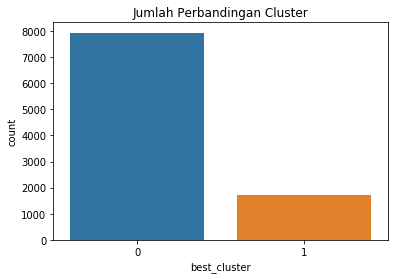

In [30]:
sns.countplot(x='best_cluster',data=dfclean)
plt.title('Jumlah Perbandingan Cluster')

Text(0.5, 1.0, 'Jumlah Perbandingan Cluster berdasarkan type')

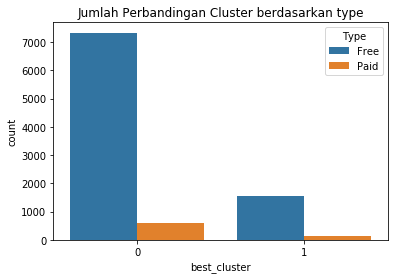

In [31]:
sns.countplot(x='best_cluster',hue='Type',data=dfclean)
plt.title('Jumlah Perbandingan Cluster berdasarkan type')

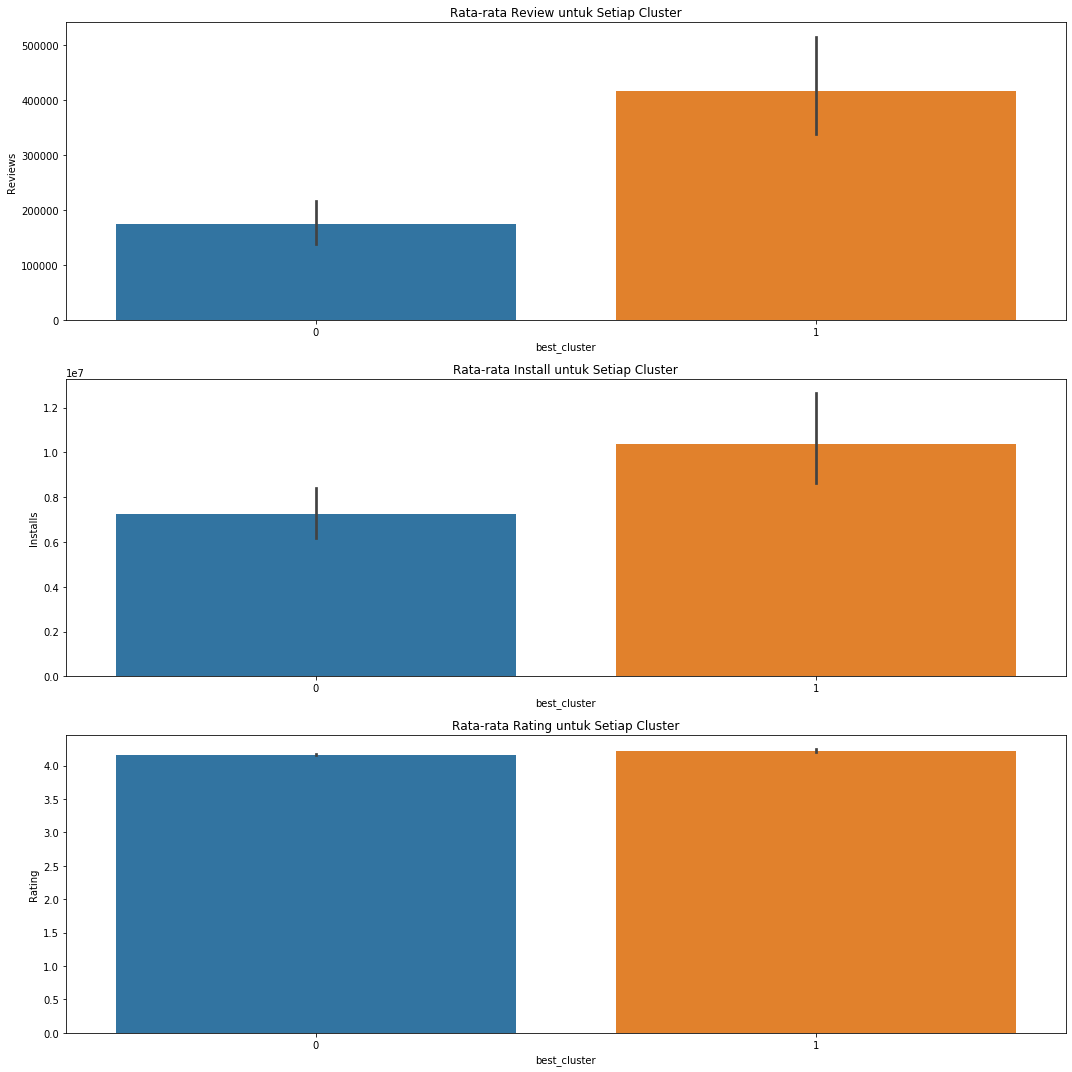

In [32]:
fig,ax = plt.subplots(nrows=3,figsize=(15,15))
sns.barplot(x='best_cluster', y='Reviews',data=dfclean, estimator=np.mean,ax=ax[0])
ax[0].set_title('Rata-rata Review untuk Setiap Cluster')
sns.barplot(x='best_cluster', y='Installs',data=dfclean, estimator=np.mean,ax=ax[1])
ax[1].set_title('Rata-rata Install untuk Setiap Cluster')
sns.barplot(x='best_cluster', y='Rating',data=dfclean, estimator=np.mean,ax=ax[2])
ax[2].set_title('Rata-rata Rating untuk Setiap Cluster')

plt.tight_layout()

#### Cluster 0 dengan Type Paid

In [33]:
dfunpop_paid=dfclean[(dfclean['best_cluster'] == 0) &(dfclean['Type'] == 'Paid')].sort_values('Price',ascending=False)
dfunpop_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated(days ago),Current Ver,Android Ver,best_cluster
8513,EP Cook Book,MEDICAL,4.19,0,3.2,0,Paid,200.00,Everyone,Medical,1384,1.0,3.0 and up,0
5491,cronometra-br,PRODUCTIVITY,4.21,0,5.4,0,Paid,154.99,Everyone,Productivity,532,1.0.0,4.1 and up,0
5423,BP Fitness Lead Scanner,EVENTS,4.44,0,6.7,1,Paid,109.99,Everyone,Events,625,0.0.1,4.1 and up,0
8524,Lean EQ,BUSINESS,4.12,6,10.0,10,Paid,89.99,Everyone,Business,815,1.0,4.1 and up,0
1601,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.0,1000,Paid,79.99,Everyone,Medical,326,19.0,4.0.3 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,W-History Standalone,SOCIAL,3.20,38,1.5,1000,Paid,0.99,Everyone,Social,427,1.935,7.0 and up,0
7154,Diseño de columnas NTC - RSEE 2017,PRODUCTIVITY,4.21,6,2.8,100,Paid,0.99,Everyone,Productivity,41,2.0,4.1 and up,0
4915,Droid PRoCon BF3,TOOLS,3.50,412,2.6,5000,Paid,0.99,Everyone,Tools,152,2.2,3.0 and up,0
4888,Wolf of the BF:Commando MOBILE,GAME,3.40,32,27.0,1000,Paid,0.99,Everyone 10+,Arcade,778,1.00.10,4.0 and up,0


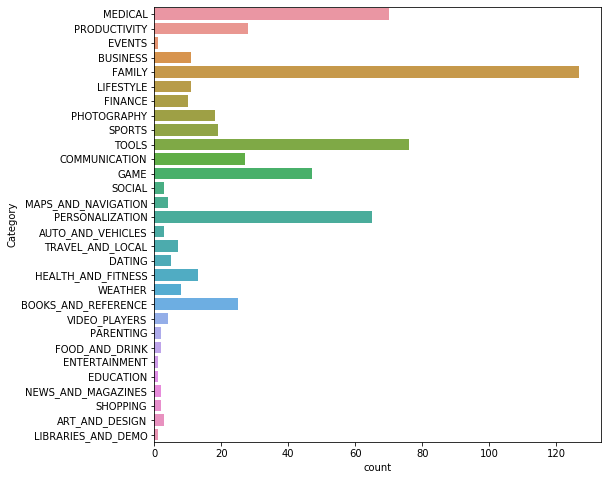

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(y='Category',data=dfunpop_paid)

In [35]:
genre_meanrev = dfunpop_paid.groupby(['Category']).mean()['Reviews'] 

genre_meanrev = round(genre_meanrev.sort_values(ascending=False),0) 

df_genre_meanrev = pd.DataFrame(genre_meanrev)
df_genre_meanrev.head(10)

,Reviews
Category,
FAMILY,23528.0
GAME,21348.0
WEATHER,17055.0
ENTERTAINMENT,6238.0
PRODUCTIVITY,6133.0
PERSONALIZATION,4460.0
PARENTING,4183.0
LIFESTYLE,3833.0
PHOTOGRAPHY,3649.0


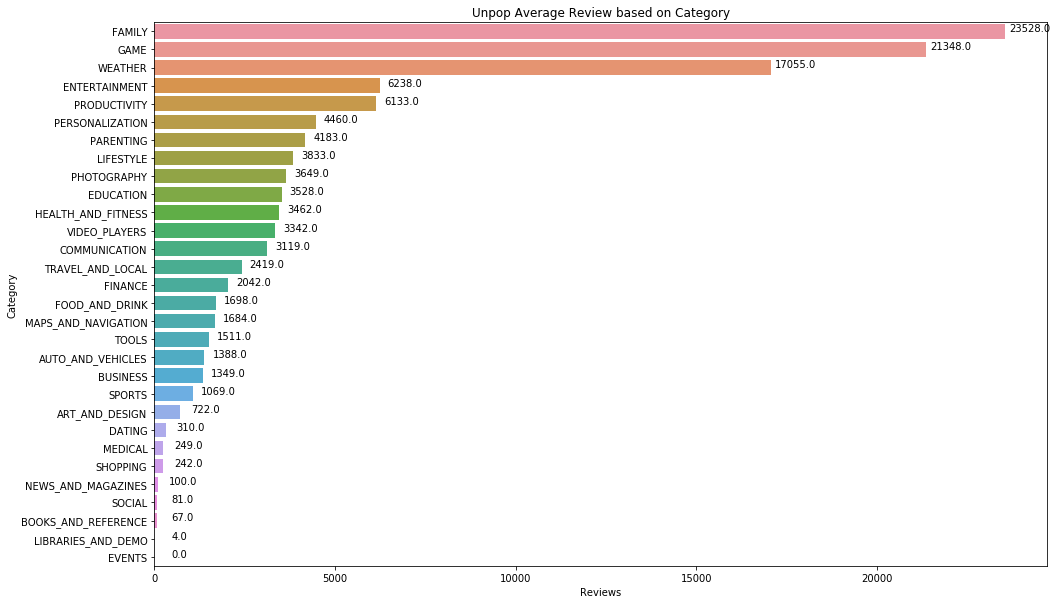

In [36]:
plt.figure(figsize=(16,10))
axrev=sns.barplot(x='Reviews',y=df_genre_meanrev.index,data=df_genre_meanrev)
axrev.set_title("Unpop Average Review based on Category")

for p in axrev.patches:
    width = p.get_width()
    axrev.text(width+700, p.get_y()+p.get_height()/2,width ,ha="center")

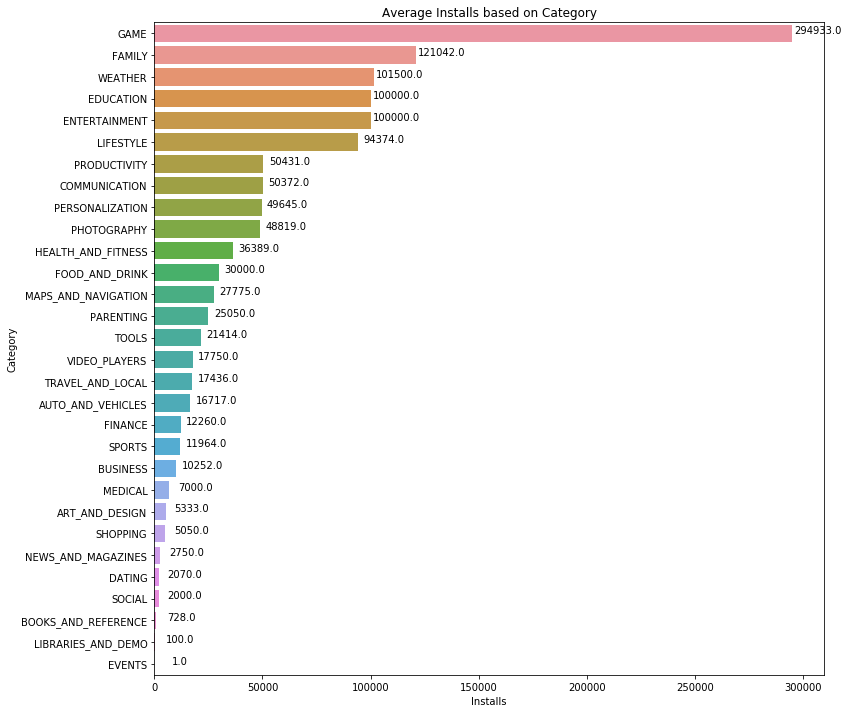

In [37]:
genre_install = dfunpop_paid.groupby(['Category']).mean()['Installs'] 

df_genre_install = pd.DataFrame(genre_install).sort_values('Installs',ascending=False)

plt.figure(figsize=(12,12))
axin=sns.barplot(x='Installs',y=df_genre_install.index,data=df_genre_install)
axin.set_title("Average Installs based on Category")

for p in axin.patches:
    width = p.get_width()
    axin.text(width+12000, p.get_y()+p.get_height()/2,round(width,0) ,ha="center")

Sekarang kita dapat membuat profil untuk setiap cluster, dengan mempertimbangkan karakteristik umum masing-masing cluster.
Sebagai contoh, dari 2 klaster dapat dinyatakan:

Aplikasi Cluster 0:
- rating baik 
- jumlah review sedikit
- Ukuran Aplikasi ringan
- jumlah Install sedikit
- Kurang terupdate


Aplikasi Cluster 1:
- Rating baik
- jumlah review banyak
- Ukuran Aplikasi besar
- jumlah install banyak
- Aplikasi terupdate




## Recommended System

In [38]:
app=pd.read_csv('Clean_data.csv')

In [39]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated(days ago),Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,488,1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,282,1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,336,Varies with device,4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,324,1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,775,1.0,2.3 and up


In [40]:
app['Genres'].value_counts()

Tools                                826
Entertainment                        556
Education                            509
Business                             419
Medical                              396
                                    ... 
Travel & Local;Action & Adventure      1
Art & Design;Action & Adventure        1
Trivia;Education                       1
Entertainment;Education                1
Board;Pretend Play                     1
Name: Genres, Length: 118, dtype: int64

In [41]:
ext = CountVectorizer(tokenizer= lambda x: x.split(';'))
extract_genre = ext.fit_transform(app['Genres'])

print(len(ext.get_feature_names()))
print(ext.get_feature_names())

53
['action', 'action & adventure', 'adventure', 'arcade', 'art & design', 'auto & vehicles', 'beauty', 'board', 'books & reference', 'brain games', 'business', 'card', 'casino', 'casual', 'comics', 'communication', 'creativity', 'dating', 'education', 'educational', 'entertainment', 'events', 'finance', 'food & drink', 'health & fitness', 'house & home', 'libraries & demo', 'lifestyle', 'maps & navigation', 'medical', 'music', 'music & audio', 'music & video', 'news & magazines', 'parenting', 'personalization', 'photography', 'pretend play', 'productivity', 'puzzle', 'racing', 'role playing', 'shopping', 'simulation', 'social', 'sports', 'strategy', 'tools', 'travel & local', 'trivia', 'video players & editors', 'weather', 'word']


In [42]:
df_genre = pd.DataFrame(extract_genre.toarray(), columns=ext.get_feature_names())
df_genre

,action,action & adventure,adventure,arcade,art & design,auto & vehicles,beauty,board,books & reference,brain games,...,simulation,social,sports,strategy,tools,travel & local,trivia,video players & editors,weather,word
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9629,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_use = pd.concat([app, df_genre],axis=1)
df_use = df_use.drop(['App','Content Rating','Current Ver','Android Ver','Category','Genres','Size'],axis=1)

In [44]:
df_use=pd.get_dummies(df_use,columns=['Type'])

In [45]:
df_use

,Rating,Reviews,Installs,Price,Last Updated(days ago),action,action & adventure,adventure,arcade,art & design,...,sports,strategy,tools,travel & local,trivia,video players & editors,weather,word,Type_Free,Type_Paid
0,4.10,159,10000,0.0,488,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4.70,87510,5000000,0.0,282,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,4.50,215644,50000000,0.0,336,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4.30,967,100000,0.0,324,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,4.40,167,50000,0.0,775,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,4.50,38,5000,0.0,654,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9627,5.00,4,100,0.0,308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9628,4.19,3,1000,0.0,84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9629,4.50,114,1000,0.0,1572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0



#### Cosine Similarity
$\displaystyle \cos(A,B)= \frac{A.B}{||A||||B||}$

In [46]:
co_score = cosine_similarity(df_use)

In [47]:
co_score

array([[1.        , 0.99881307, 0.9987449 , ..., 0.99929511, 0.57704342,
        0.9985275 ],
       [0.99881307, 1.        , 0.99991305, ..., 0.99638088, 0.53676711,
        0.99975115],
       [0.9987449 , 0.99991305, 1.        , ..., 0.99648062, 0.53599698,
        0.99937005],
       ...,
       [0.99929511, 0.99638088, 0.99648062, ..., 1.        , 0.60453158,
        0.99580832],
       [0.57704342, 0.53676711, 0.53599698, ..., 0.60453158, 1.        ,
        0.53776344],
       [0.9985275 , 0.99975115, 0.99937005, ..., 0.99580832, 0.53776344,
        1.        ]])

In [48]:
df_cosine_sim = pd.DataFrame(co_score)
df_cosine_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,9621,9622,9623,9624,9625,9626,9627,9628,9629,9630
0,1.000000,0.998813,0.998745,0.998945,0.999368,0.999076,0.998595,0.998838,0.999837,0.998812,...,0.999815,0.999552,0.513380,0.625034,0.059213,0.996663,0.354885,0.999295,0.577043,0.998528
1,0.998813,1.000000,0.999913,0.999964,0.999781,0.999875,0.999814,0.999993,0.999504,0.999993,...,0.997771,0.999804,0.471022,0.586291,0.010547,0.991513,0.308966,0.996381,0.536767,0.999751
2,0.998745,0.999913,1.000000,0.999980,0.999880,0.999971,0.999472,0.999955,0.999487,0.999954,...,0.997811,0.999789,0.470772,0.586226,0.010499,0.991549,0.308800,0.996481,0.535997,0.999370
3,0.998945,0.999964,0.999980,1.000000,0.999905,0.999972,0.999627,0.999988,0.999609,0.999986,...,0.998022,0.999872,0.473715,0.588865,0.013732,0.991967,0.311928,0.996725,0.539024,0.999541
4,0.999368,0.999781,0.999880,0.999905,1.000000,0.999969,0.999321,0.999834,0.999840,0.999825,...,0.998711,0.999957,0.484362,0.598700,0.025989,0.993436,0.323485,0.997659,0.548922,0.999215


In [49]:
print(df_use.shape)
print(df_cosine_sim.shape)

(9631, 60)
(9631, 9631)


In [50]:
i = 0
print(app.iloc[i])
print(co_score[i])

App                       Photo Editor & Candy Camera & Grid & ScrapBook
Category                                                  ART_AND_DESIGN
Rating                                                               4.1
Reviews                                                              159
Size                                                                  19
Installs                                                           10000
Type                                                                Free
Price                                                                  0
Content Rating                                                  Everyone
Genres                                                      Art & Design
Last Updated(days ago)                                               488
Current Ver                                                        1.0.0
Android Ver                                                 4.0.3 and up
Name: 0, dtype: object
[1.         0.99881307 0.998

In [51]:
fav_app = 'Minecraft'
fav_idx = app[app['App'] == fav_app].index[0]
fav_idx

3163

In [52]:
app_dict = list(enumerate(co_score[fav_idx]))


In [53]:
app_dict_sort = sorted(app_dict, key=lambda x: x[1], reverse=True)

In [54]:
# # Get the scores of the 5 most similar clothes
sim_scores_top = app_dict_sort[1:6]
print(sim_scores_top)

[(321, 0.9999999595902515), (248, 0.9999990330529394), (4198, 0.99999701573075), (7712, 0.9999933680702899), (2804, 0.9999822768523764)]


In [55]:
app_indices = [i[0] for i in sim_scores_top]
print(app_indices)

[321, 248, 4198, 7712, 2804]


In [56]:

counter=0
for i in app_indices:
    counter+=1
    print(counter)
    print(app.iloc[i,:])

1
App                       Should I Answer?
Category                     COMMUNICATION
Rating                                 4.8
Reviews                             237468
Size                                   8.8
Installs                           1000000
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                       Communication
Last Updated(days ago)                 288
Current Ver                     2018.1.715
Android Ver                     4.0 and up
Name: 321, dtype: object
2
App                       Manga Rock - Best Manga Reader
Category                                          COMICS
Rating                                               4.4
Reviews                                           238970
Size                                                  28
Installs                                         1000000
Type                                                Free
Price        

## Embeding Methods Principal Component Analysis

Untuk mengoptimalkan Model ada salah satu cara yaitu Principal Component Analysis, PCA merupakan embedding Methods digunakan umumnya ketika kita memiliki banyak fitur, maka PCA akan mentransformasikan fitur tesebut menjadi lebih padat atau compressed. Pada Kasus ini saya bisa menggunakan PCA karena data memiliki banyak fitur yaitu 61 fitur/kolom.

In [57]:
df_use.columns

Index(['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated(days ago)',
       'action', 'action & adventure', 'adventure', 'arcade', 'art & design',
       'auto & vehicles', 'beauty', 'board', 'books & reference',
       'brain games', 'business', 'card', 'casino', 'casual', 'comics',
       'communication', 'creativity', 'dating', 'education', 'educational',
       'entertainment', 'events', 'finance', 'food & drink',
       'health & fitness', 'house & home', 'libraries & demo', 'lifestyle',
       'maps & navigation', 'medical', 'music', 'music & audio',
       'music & video', 'news & magazines', 'parenting', 'personalization',
       'photography', 'pretend play', 'productivity', 'puzzle', 'racing',
       'role playing', 'shopping', 'simulation', 'social', 'sports',
       'strategy', 'tools', 'travel & local', 'trivia',
       'video players & editors', 'weather', 'word', 'Type_Free', 'Type_Paid'],
      dtype='object')

In [58]:
from sklearn.decomposition import PCA

In [59]:
df_embed = df_use.copy()


pca2 = PCA(n_components=2)
pca2.fit(df_embed)
df_embed2 = pca2.transform(df_embed)
print("EVR 2 comp : ",pca2.explained_variance_ratio_.sum())


pca = PCA(n_components=3)
pca.fit(df_embed)
df_embed3 = pca.transform(df_embed)
print("EVR 3 comp : ",pca.explained_variance_ratio_.sum())


pca4 = PCA(n_components=4)
pca4.fit(df_embed)
df_embed4 = pca4.transform(df_embed)
print("EVR 4 comp : ",pca4.explained_variance_ratio_.sum())

pca5 = PCA(n_components=5)
pca5.fit(df_embed)
df_embed5 = pca5.transform(df_embed)
print("EVR 5 comp : ",pca5.explained_variance_ratio_.sum())

pca6 = PCA(n_components=6)
pca6.fit(df_embed)
df_embed6 = pca6.transform(df_embed)
print("EVR 6 comp : ",pca6.explained_variance_ratio_.sum())



EVR 2 comp :  0.9999999999401277
EVR 3 comp :  0.9999999999999933
EVR 4 comp :  0.999999999999998
EVR 5 comp :  0.9999999999999981
EVR 6 comp :  0.9999999999999984


Ratio penjelasan tertinggi adalah component 6, maka akan dipilih sebagai model pca yang akan digunakan


In [60]:
dfpca6=pd.DataFrame(df_embed6,columns=['embed 1','embed 2','embed 3','embed 4','embed 5','embed 6'])
dfpca6

,embed 1,embed 2,embed 3,embed 4,embed 5,embed 6
0,-7.809574e+06,-50859.695775,-21.815918,-0.409515,0.073688,0.088164
1,-2.818845e+06,-69768.509778,-225.063110,-0.292178,-0.493389,0.115470
2,4.217368e+07,-899739.847818,-151.113687,-0.290557,-0.300628,0.096939
3,-7.719577e+06,-51968.030300,-185.771943,-0.319908,-0.105556,0.082175
4,-7.769583e+06,-51703.323078,265.200943,-0.564094,-0.259663,0.153135
...,...,...,...,...,...,...
9626,-7.814576e+06,-50874.216651,144.181023,-0.498003,-0.387689,0.142041
9627,-7.819475e+06,-50803.882527,-201.821308,-0.308953,-0.839099,0.142845
9628,-7.818575e+06,-50824.042173,-425.820809,-0.183872,0.038554,-0.010133
9629,-7.818573e+06,-50713.078317,1062.179736,-0.995458,-0.474964,0.254689


In [61]:

# MENYIMPAN DENGAN JOBLIB
joblib.dump(pca6, 'PCA_')
joblib.dump(df_embed, 'items_embed')

['items_embed']

In [62]:
# membuat matrix similarity

print(df_embed.shape)
print(dfpca6.shape)
cos_score_pca = cosine_similarity(dfpca6)
print(cos_score_pca.shape)



(9631, 60)
(9631, 6)
(9631, 9631)


In [63]:
app_dict_pca = list(enumerate(cos_score_pca[fav_idx]))

In [64]:
app_dict_pca_sort = sorted(app_dict_pca, key=lambda x: x[1], reverse=True)
# # Get the scores of the 5 most similar clothes
sim_scores_top_pca = app_dict_sort[1:6]
print(sim_scores_top_pca)

[(321, 0.9999999595902515), (248, 0.9999990330529394), (4198, 0.99999701573075), (7712, 0.9999933680702899), (2804, 0.9999822768523764)]


In [65]:
app_indices_pca = [i[0] for i in sim_scores_top_pca]
print(app_indices_pca)


[321, 248, 4198, 7712, 2804]


In [66]:
counter=0
for i in app_indices_pca:
    counter+=1
    print(counter)
    print(app.iloc[i,:])

1
App                       Should I Answer?
Category                     COMMUNICATION
Rating                                 4.8
Reviews                             237468
Size                                   8.8
Installs                           1000000
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                       Communication
Last Updated(days ago)                 288
Current Ver                     2018.1.715
Android Ver                     4.0 and up
Name: 321, dtype: object
2
App                       Manga Rock - Best Manga Reader
Category                                          COMICS
Rating                                               4.4
Reviews                                           238970
Size                                                  28
Installs                                         1000000
Type                                                Free
Price        


Hasil Rekomendasi Sama dengan sebelum di PCA

## Sistem Rekomendasi dengan Model NearestNeighbors


disini akan digunakan NearestNeighbors class sebagai model_knn and memfit sparse matrix,dengan menggunakan metric = cosine, model akan menghitung similarity setiap vector dengan menggunakan cosine similarity seperti sebelumnya.



In [67]:
nn = NearestNeighbors(metric='cosine', algorithm='brute',n_neighbors=10)

In [68]:
joblib.dump(nn, 'NN')

['NN']

In [79]:
def fuzzy_matching(mapper, fav_app, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict (animes_to_app), map app title name to index of the app in data

    fav_app: str, name of user input app
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_app.lower())
        if ratio > 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('App yang anda cari tidak ada')
        return
    if verbose:
        print('App yang anda cari ditemukan di database kami: {}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

def make_recommendation(model_knn, data, mapper, fav_app, n_recommendation):
    list_rekom=[]
    """
    return top n similar movie recommendations based on user's input movie


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: df_use for training

    mapper: dict (app_to_idx), map app title name to index of the movie in data

    fav_app: str, name of user input app

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar app recommendations
    """
    model_knn.fit(data)
    # get input movie index
    print('Anda telah memilih App: {}'.format(fav_app))
    idx = fuzzy_matching(mapper, fav_app, verbose=True)
    print('Sedang memuat App')
    print('.......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendation+1)
    # get list of raw index
    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x:x[1])[:0:-1]
    reverse_mapper = {v: k for k, v in mapper.items()}
    
#     print('Rekomendasi untuk: {}'.format(fav_app))
    for i, (idx, dist) in enumerate(raw_recommends):
        appitem='{}: {}, dengan distance of {}'.format(i+1, reverse_mapper[idx], dist)
        list_rekom.append(appitem)
    
    return list_rekom
        

In [70]:
app_to_idx = {title: i for i, title in enumerate(list(app.loc[df_use.index]['App']))}


In [78]:
joblib.dump(app_to_idx, 'app_to_idx')

['app_to_idx']

In [71]:
app_mtx_sparse = csr_matrix(df_use.values)

In [72]:
app_mtx_pca_sparse = csr_matrix(dfpca6.values)

In [74]:
joblib.dump(app_mtx_pca_sparse, 'items_embed')

['items_embed']

In [75]:
my_favorite = input('Masukkan app favorit anda:')

make_recommendation(model_knn=nn, data=app_mtx_pca_sparse, fav_app=my_favorite,
                   mapper=app_to_idx, n_recommendation=10)

Masukkan app favorit anda: minecraft


Anda telah memilih App: minecraft
App yang anda cari ditemukan di database kami: ['Minecraft', 'News Minecraft.fr']

Sedang memuat App
.......

Rekomendasi untuk: minecraft
1: PES 2018 PRO EVOLUTION SOCCER, dengan distance of 0.015476738853136607
2: FRONTLINE COMMANDO: D-DAY, dengan distance of 0.01471780649163179
3: Homescapes, dengan distance of 0.010064178171745874
4: The Tribez: Build a Village, dengan distance of 0.0093395088179552
5: MORTAL KOMBAT X, dengan distance of 0.00880996204855422
6: Fallout Shelter, dengan distance of 0.002755583284441143
7: Angry Birds Epic RPG, dengan distance of 0.0016035579535516042
8: Fishdom, dengan distance of 0.001393094923645255
9: Last Day on Earth: Survival, dengan distance of 0.0001220584206396147
10: Injustice: Gods Among Us, dengan distance of 0.00011187645014065772


Hasil Rekomendasi dari model nn lebih bagus karena genre dari aplikasi favorit sesuai dengan rekomendasi dimana minecraft merupakan game dan rekomendasinya berupa game.

In [80]:
my_favorite = input('Masukkan app favorit anda:')

rcitem=make_recommendation(model_knn=nn, data=app_mtx_pca_sparse, fav_app=my_favorite,
                   mapper=app_to_idx, n_recommendation=10)

Masukkan app favorit anda: minecraft


Anda telah memilih App: minecraft
App yang anda cari ditemukan di database kami: ['Minecraft', 'News Minecraft.fr']

Sedang memuat App
.......



In [81]:
rcitem

['1: PES 2018 PRO EVOLUTION SOCCER, dengan distance of 0.015476738853136607',
 '2: FRONTLINE COMMANDO: D-DAY, dengan distance of 0.01471780649163179',
 '3: Homescapes, dengan distance of 0.010064178171745874',
 '4: The Tribez: Build a Village, dengan distance of 0.0093395088179552',
 '5: MORTAL KOMBAT X, dengan distance of 0.00880996204855422',
 '6: Fallout Shelter, dengan distance of 0.002755583284441143',
 '7: Angry Birds Epic RPG, dengan distance of 0.0016035579535516042',
 '8: Fishdom, dengan distance of 0.001393094923645255',
 '9: Last Day on Earth: Survival, dengan distance of 0.0001220584206396147',
 '10: Injustice: Gods Among Us, dengan distance of 0.00011187645014065772']